In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Generate Input Data(X) and Output Data(Y)
torch.manual_seed(71) # For reproducibility
X = torch.linspace(0, 50, 100).reshape(-1, 1)
print(X.shape)
print(X.ndim)

torch.Size([100, 1])
2


In [4]:
e = torch.randint(-9, 9, (100, 1))
print(e.shape)
y = X * 2 + e
print(y.shape)

torch.Size([100, 1])
torch.Size([100, 1])


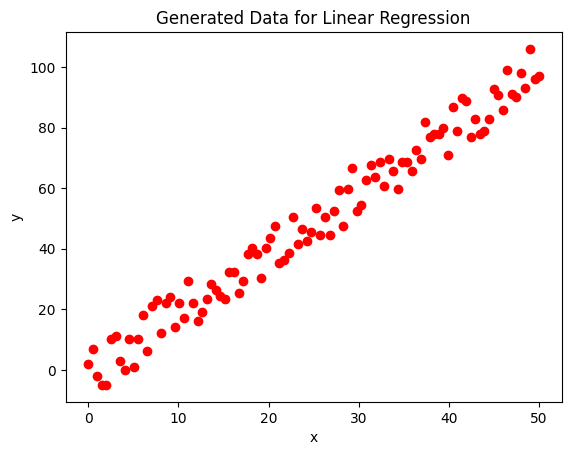

In [5]:
plt.scatter(X, y, color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data for Linear Regression')
plt.show()

In [6]:
# Define the Linear Model Class
class Model(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__()
    self.linear = nn.Linear(in_features, out_features)

  def forward(self, x):
    return self.linear(x)

In [7]:
#Initialize the Model

torch.manual_seed(59) #Ensure same initial weights
model = Model(1, 1)

In [8]:
# Print Initial Weights and Bias
initial_weight = model.linear.weight.item()
initial_bias = model.linear.bias.item()
print("\nName: Hari Prasath P")
print("Register NO: 212223230070")
print(f'Initial Weight: {initial_weight:.8f}, Initial Bias: {initial_bias:.8f}\n')


Name: Hari Prasath P
Register NO: 212223230070
Initial Weight: 0.10597813, Initial Bias: 0.96379614



In [9]:
#Define Loss Function & Optimizer

loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [10]:
#Train the Model

epochs = 50
losses = []
for epoch in range(1, epochs + 1):
  y_pred = model(X)
  loss = loss_function(y_pred, y)
  losses.append(loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(f'epoch: {epoch:2}  loss: {loss.item():10.8f}  '
        f'weight: {model.linear.weight.item():10.8f}  '
        f'bias: {model.linear.bias.item():10.8f}')

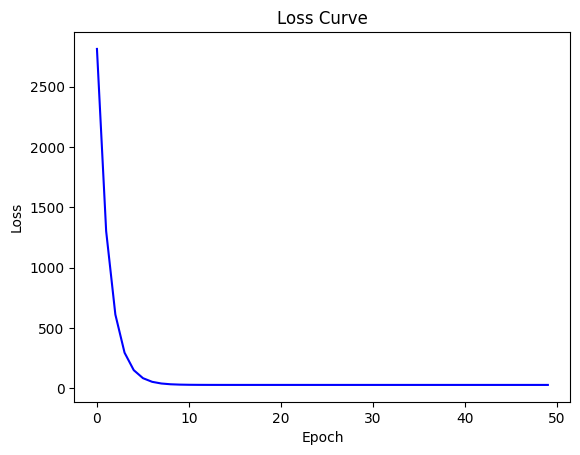

In [11]:
# Plot Loss Curve
plt.plot(range(epochs), losses, color = 'blue')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss Curve')
plt.show()

In [12]:
# Final Weights and Bias
final_weight = model.linear.weight.item()
final_bias = model.linear.bias.item()
print("\nName: Hari Prasath P")
print("Register. No: 212223230070")
print(f'\nFinal Weight: {final_weight:.8f}, Final Bias: {final_bias:.8f}')


Name: Hari Prasath P
Register. No: 212223230070

Final Weight: 1.92976642, Final Bias: 0.96463418


In [14]:
# Best-Fit Line Calculation
x1 = torch.tensor([X.min().item(), X.max().item()]) # Find min and max values of X
y1 = x1 * final_weight + final_bias # Compute correspoding y-values using trained model

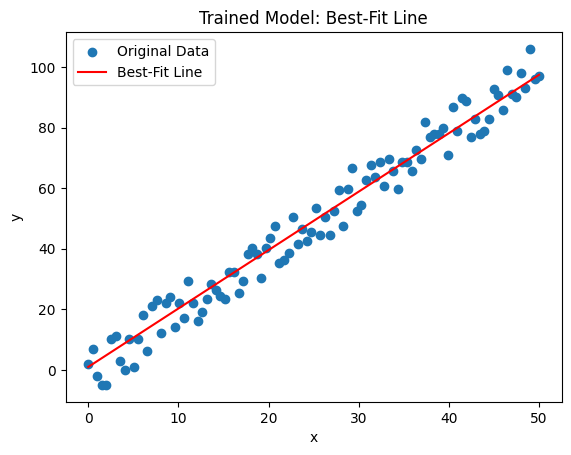

In [16]:
# Plot Original Data & Best-Fit Line
plt.scatter(X, y, label = "Original Data")
plt.plot(x1, y1, 'r', label = "Best-Fit Line")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained Model: Best-Fit Line')
plt.legend()
plt.show()

In [17]:
# Prediction for x = 120
x_new = torch.tensor([[120.0]]) # New input as a tensor
y_new_pred = model(x_new).item() # Predict using trained model
print("\nName: Hari Prasath P")
print("Register. No: 212223230070")
print(f"\nPrediction for x = 120: {y_new_pred:.8f}")


Name: Hari Prasath P
Register. No: 212223230070

Prediction for x = 120: 232.53660583
